# Lead Scoring Case Study

#### This case study is built on X Education's online platform which sells courses online. The objective of this case study is to develop a logistic regression model to assign a lead score which will be used by the company's management to target potential leads.

### Importing libraries to perform logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Reading data

In [2]:
lead_score = pd.read_csv("Leads.csv")

In [3]:
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_score.shape

(9240, 37)

In [5]:
# Checking the data types of the dataset

lead_score.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Based on the above details, we can say that there is nothing to be done on data types.

In [6]:
# Describing data with summary statistics

In [7]:
lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### From above outputs we can see that there are several data missing under many columns.

### Data cleaning

#### From the head with first 5 rows we can see that there are many data points with 'Select' as a response. This can be that data were not made mandoty fields hence the default option is selected. These values will be inputed with np.nan

In [8]:
lead_score = lead_score.replace('Select', np.nan)

In [9]:
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
round(lead_score.isnull().sum()/lead_score.shape[0]*100,0)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

#### From Null data we can see that there are columns with more than 40% missing. 

In [11]:
dropcol = ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

In [12]:
lead_score = lead_score.drop(columns=dropcol)

In [13]:
lead_score.shape

(9240, 29)

### Handling columns with missing data

#### 1. Specialization

In [14]:
# We can see that there are around 37% of missing data. 

In [15]:
lead_score['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

#### Looking at the data and what this column signifies, it is the specialization that a person has worked before. There could be instances where a student or a person does not have a specialization. Hence we can reasonable argue that this field must have left blank. Hence, we shall introduced a new level as others to indicate these people.


In [16]:
lead_score['Specialization'] = lead_score['Specialization'].replace(np.nan, 'Others')

In [17]:
lead_score['Specialization'].value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

#### 2. What is your current occupation

This column has 29% missing data.

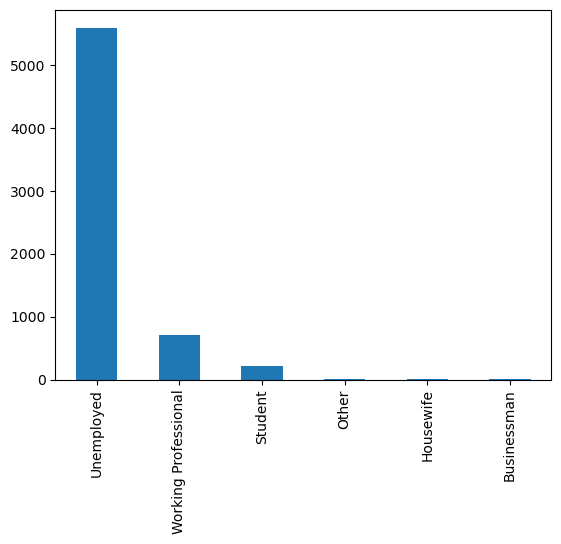

In [18]:
lead_score['What is your current occupation'].value_counts().plot.bar();

#### 

Looking at the plot above we can see that majority of the selections are unemployed. Therefore, it is safe to impute the missing data with this value.

In [19]:
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(np.nan, 'Unemployed')

#### 3. What matters most to you in choosing a course

This column has 29% missing data.


In [20]:
round(lead_score['What matters most to you in choosing a course'].value_counts()/sum(lead_score['What matters most to you in choosing a course'].value_counts())*100,2)

Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64

#### 
We see that this column is highly skewed and will not contribute significantly to the study. Therefore, this column is proposed to drop for further studies.

In [21]:
lead_score = lead_score.drop('What matters most to you in choosing a course', axis=1)

#### 4. Tags
This column has 36% missing data

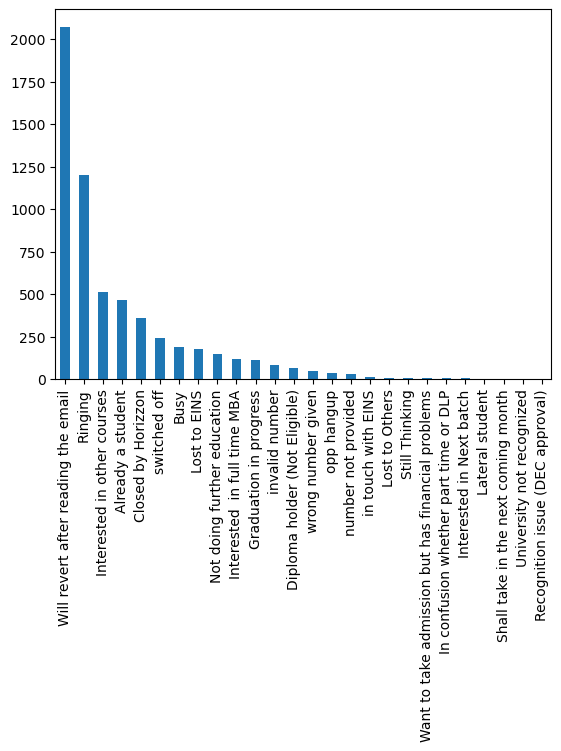

In [22]:
lead_score['Tags'].value_counts().plot.bar();

#### 
Majority of the responses are 'Will revert after reading the email'. It is safe to say that many of the prospective students will need some material or more information on the course prior to joining. Based on this logic, the missing values were imputed with this.

In [23]:
lead_score['Tags'] = lead_score['Tags'].replace(np.nan, 'Will revert after reading the email')

#### 5. Country
This column has 27% data missing.

In [24]:
lead_score['Country'].value_counts().head()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
Name: Country, dtype: int64

#### 
We can see that vast majority of students are from India. All other students are negligable. For the missing data, lets impute with unknown as we have no idea on which country the person is from.

In [25]:
lead_score['Country'] = lead_score['Country'].replace(np.nan, 'unknown')

In [26]:
lead_score['Country'].value_counts()

India                   6492
unknown                 2466
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Asia/Pacific Region        2
Italy                      2
Uganda                     2
Bangladesh                 2
Netherlands                2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland                1
Denmark       

In [27]:
round(lead_score.isnull().sum()/lead_score.shape[0]*100,2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

In [28]:
# We can see that around 3% has missing values. Therefore, these will be removed.

In [29]:
lead_score.dropna(inplace=True)

In [30]:
round(lead_score.isnull().sum()/lead_score.shape[0]*100,2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [31]:
# We can now see that there are no Null/missing values in data.

### Preperation of Data for analysis

In [32]:
# Creating a variable for numerical data

In [33]:
num_var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

#### Visualizing numerical variables

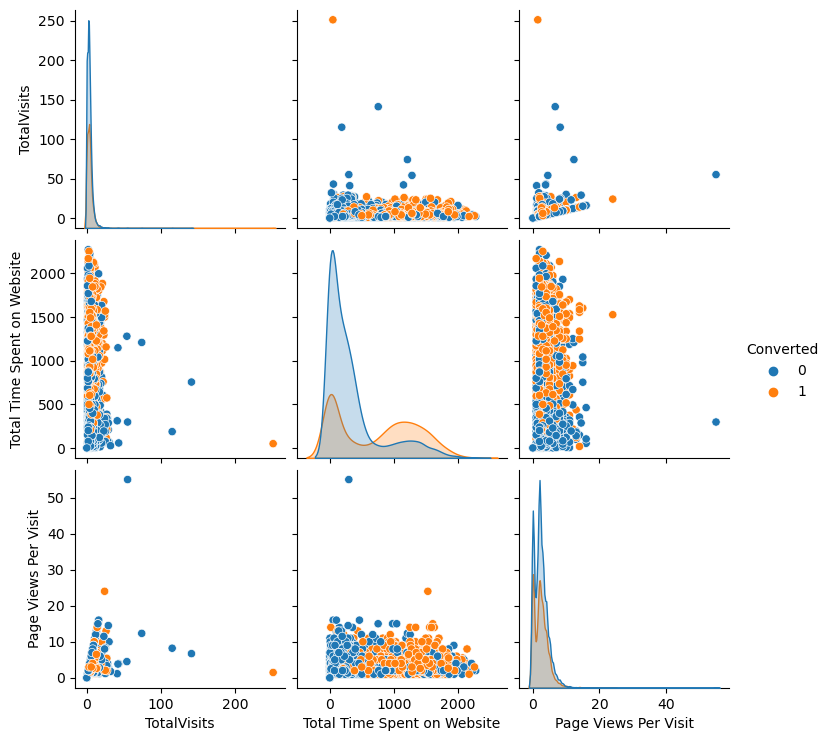

In [34]:
sns.pairplot(lead_score, vars=num_var, hue='Converted');

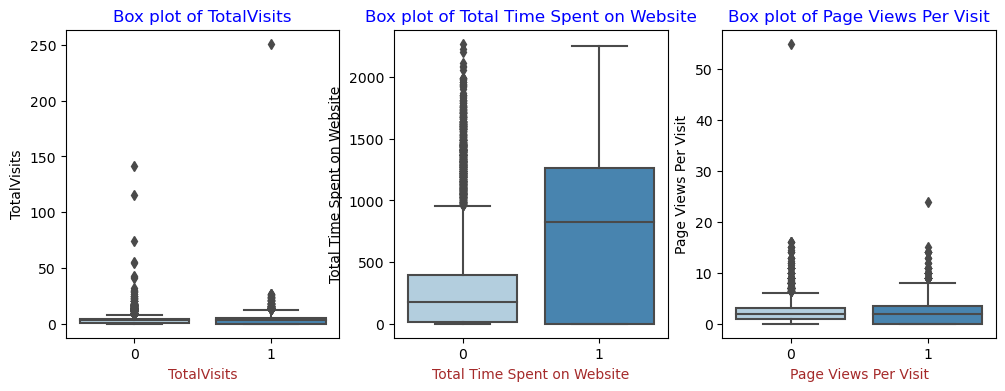

In [35]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(num_var, 1):
    plt.subplot(1,3,i)
    title_text= f'Box plot of {col}'
    x_label= f'{col}'
    fig = sns.boxplot(data= lead_score, y= col, x= 'Converted', palette= 'Blues')
    fig.set_title(title_text, fontdict= { 'fontsize': 12, 'color': 'Blue'})
    fig.set_xlabel(x_label, fontdict= {'fontsize': 10, 'color': 'Brown'})

In [36]:
# Looks like there are outliers present in the data
# Remove data which is more tha 99th percentile to clear outliers. 
# In Total time spent on website, we see that data are continuously scattered together. hence, not removed.

In [37]:
lead_score['TotalVisits'].quantile([0.9,0.95,0.99]).values

array([ 7., 10., 17.])

In [38]:
lead_score= lead_score[~(lead_score['TotalVisits'] > 17)]

In [39]:
lead_score['Page Views Per Visit'].quantile([0.9,0.95,0.99]).values

array([5., 6., 9.])

In [40]:
lead_score= lead_score[~(lead_score['Page Views Per Visit'] > 9)]

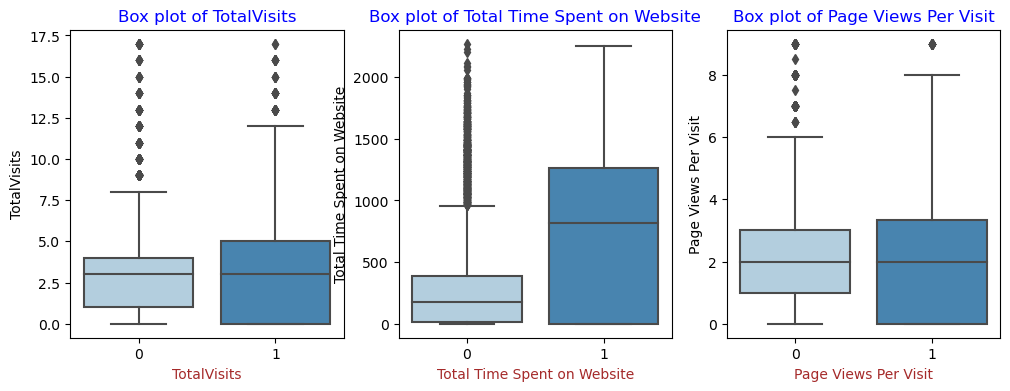

In [41]:
plt.figure(figsize=(12, 4))
for i, col in enumerate(num_var, 1):
    plt.subplot(1,3,i)
    title_text= f'Box plot of {col}'
    x_label= f'{col}'
    fig = sns.boxplot(data= lead_score, y= col, x= 'Converted', palette= 'Blues')
    fig.set_title(title_text, fontdict= { 'fontsize': 12, 'color': 'Blue'})
    fig.set_xlabel(x_label, fontdict= {'fontsize': 10, 'color': 'Brown'})

In [42]:
# Creating a variable for all categorical variables


In [43]:
cat_var = ['Lead Origin', 'Lead Source','Do Not Email', 'Do Not Call', 'Last Activity', 'Country','Specialization', 'What is your current occupation','Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content','Get updates on DM Content','A free copy of Mastering The Interview','Last Notable Activity','I agree to pay the amount through cheque', 'Tags']

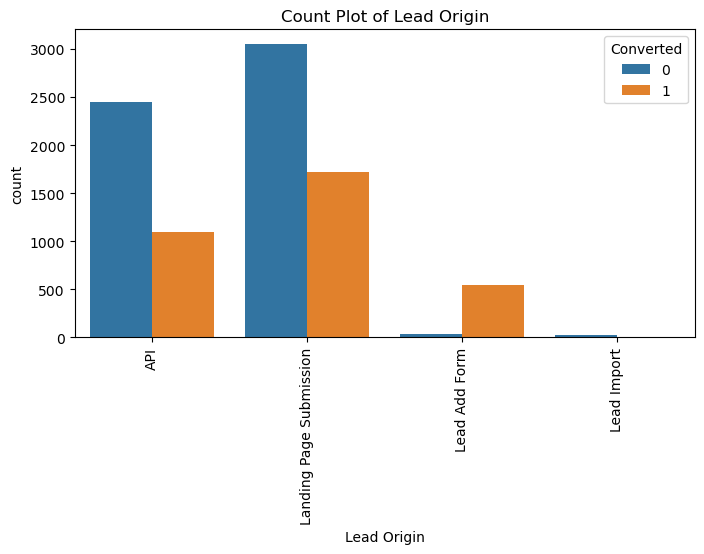

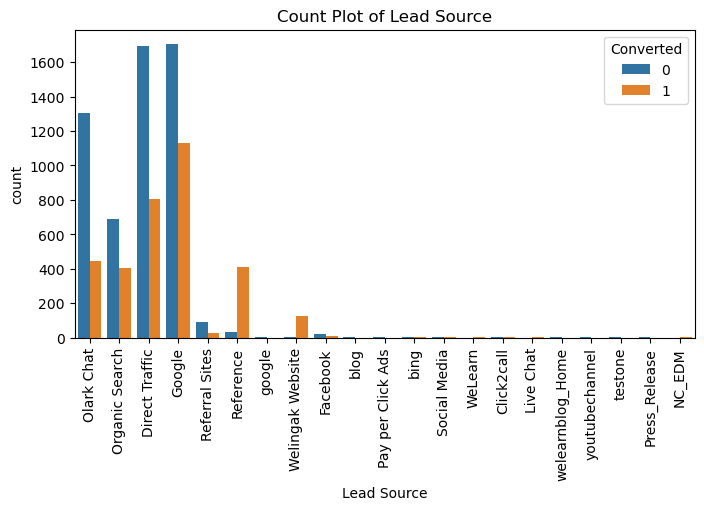

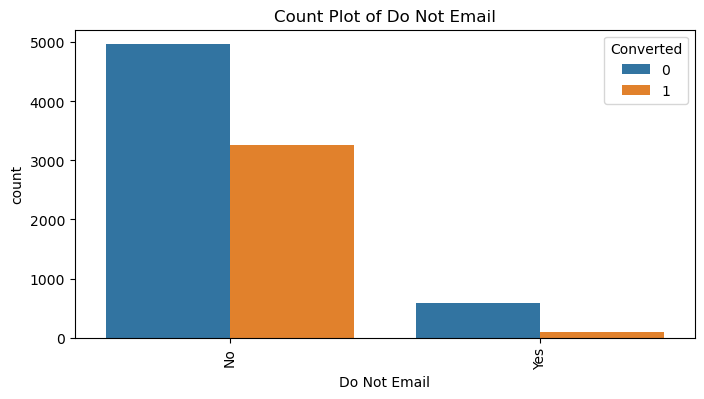

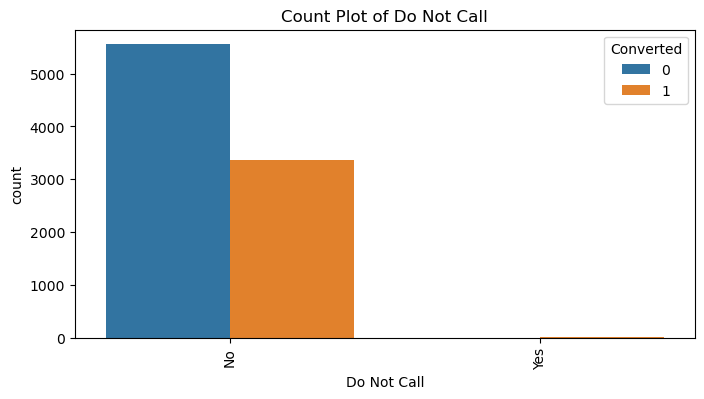

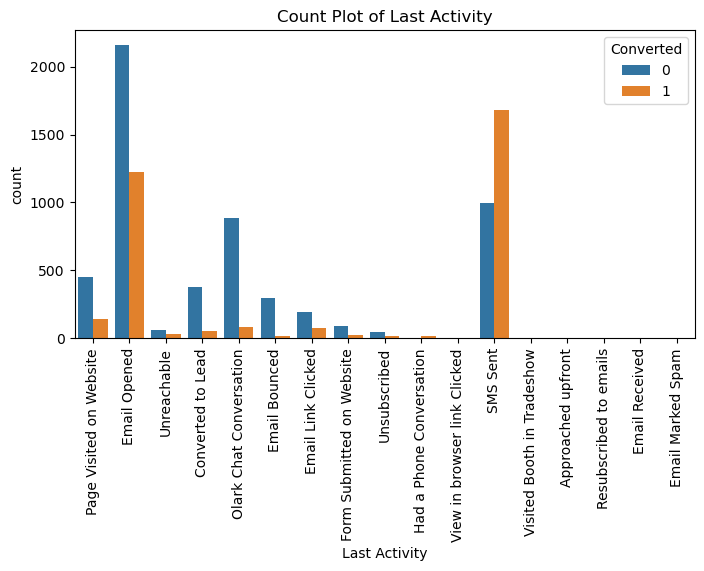

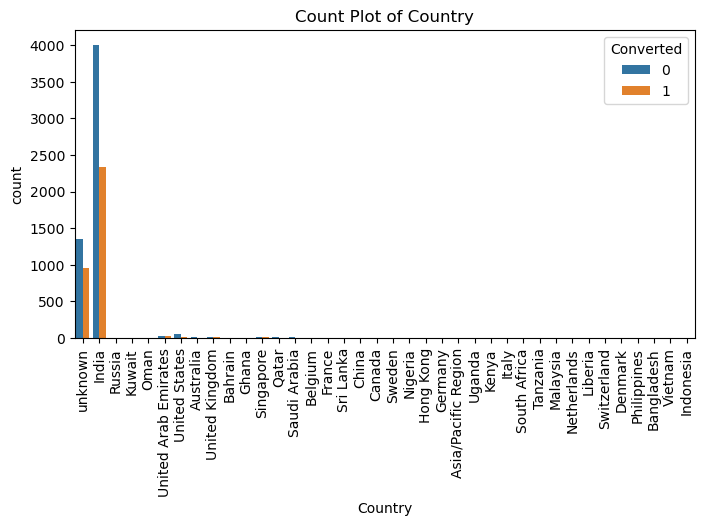

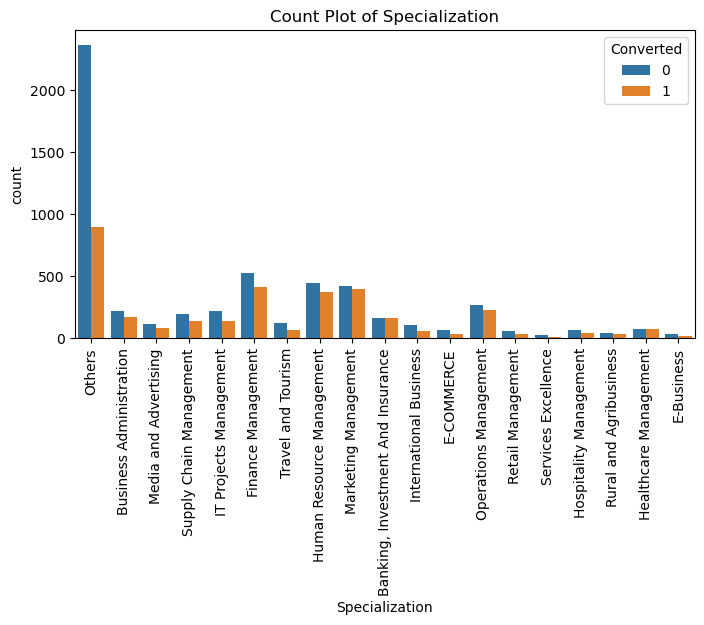

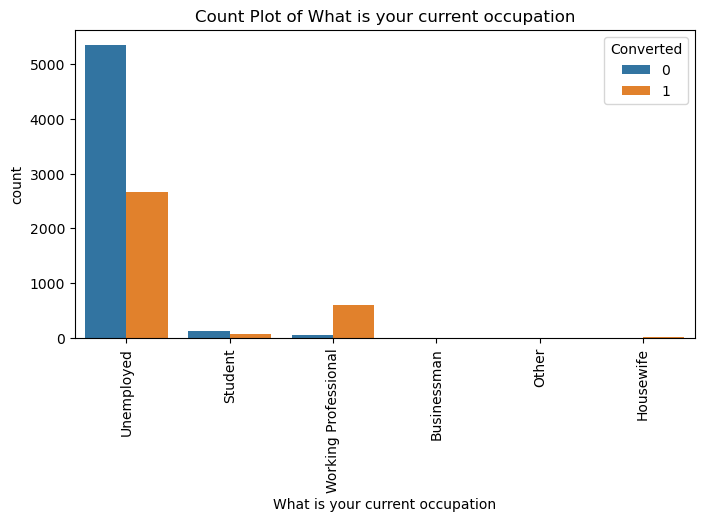

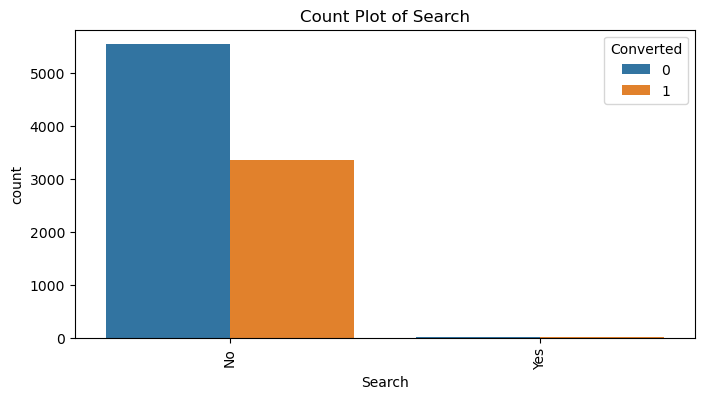

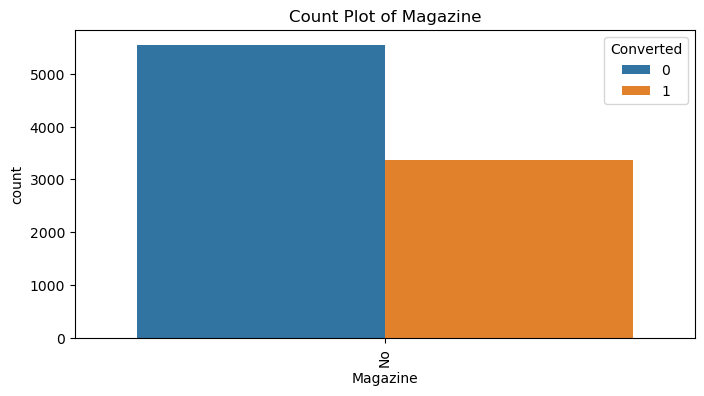

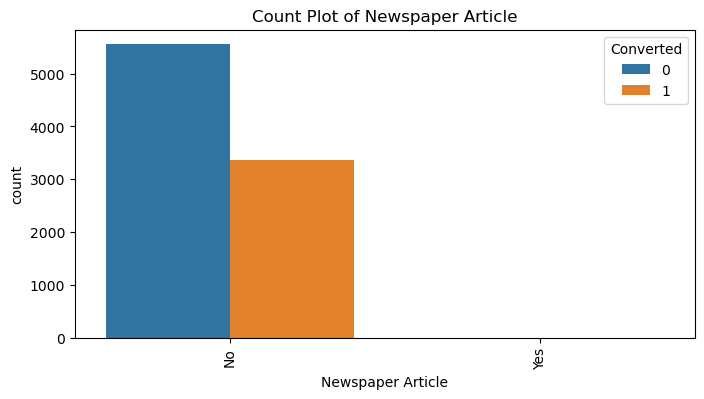

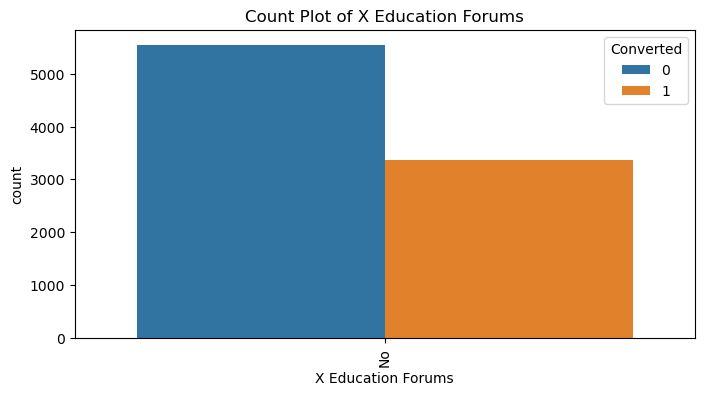

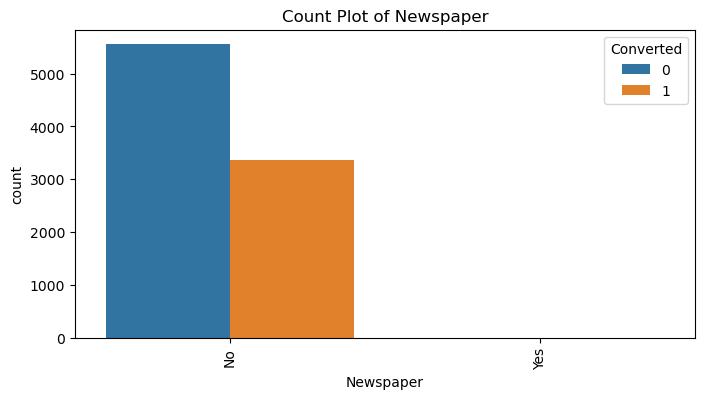

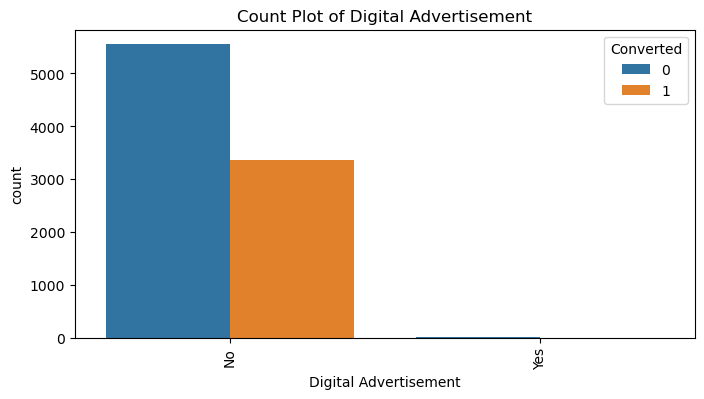

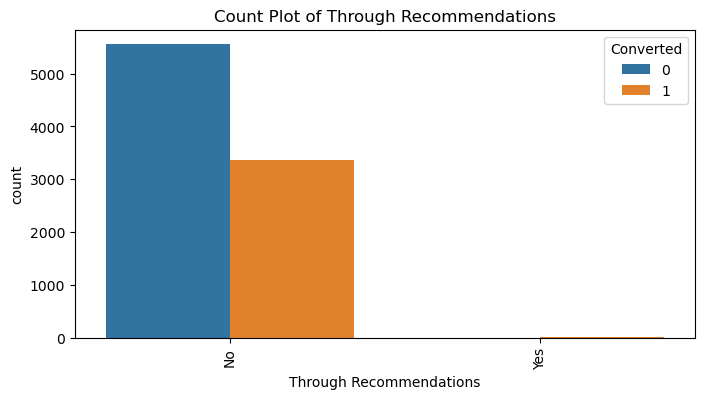

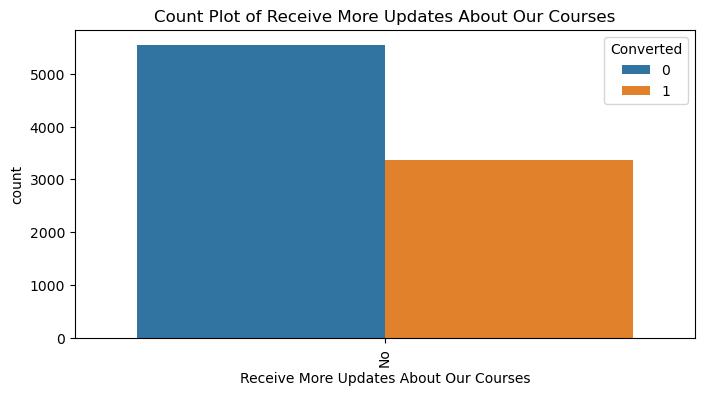

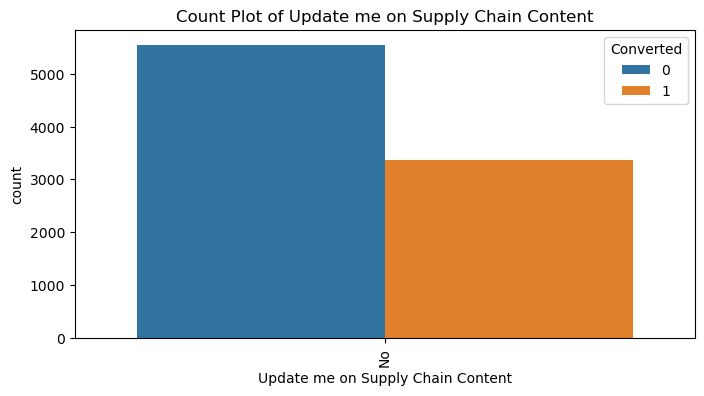

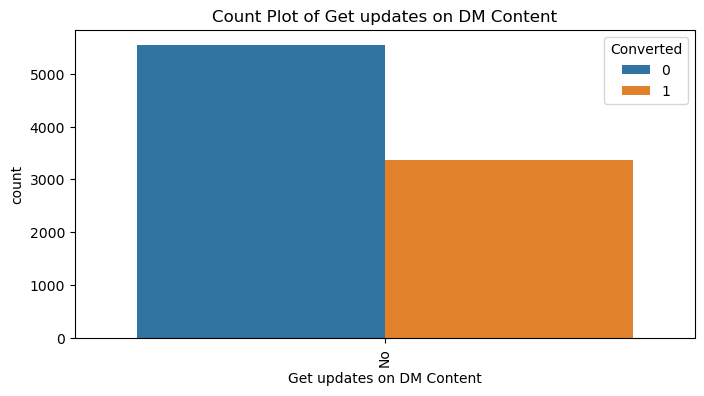

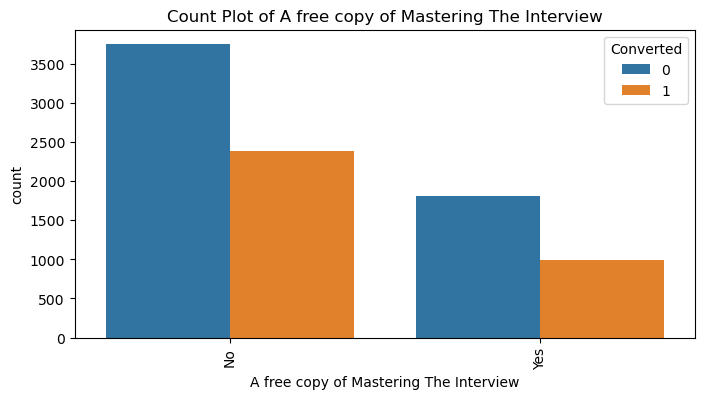

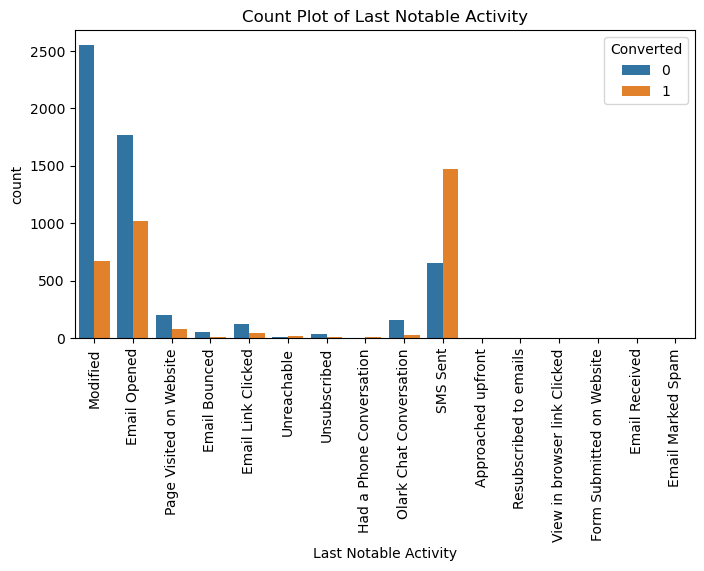

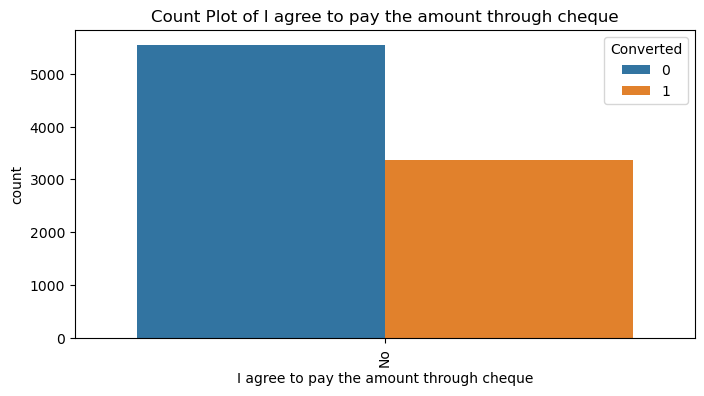

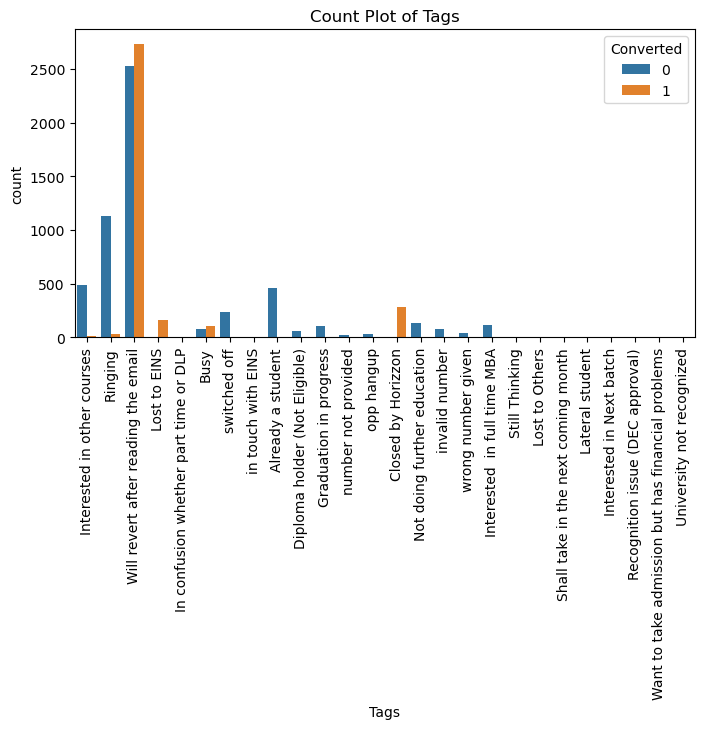

In [44]:
for var in cat_var:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=var,data=lead_score, hue='Converted')
        plt.title(f'Count Plot of {var}')
        plt.xticks(rotation=90)
        plt.show()

#### Insights and adjustments

#### 1. Lead Source

In [45]:
# From the Lead Source we can see that there are 'Google' and google are repeated. This will be added to one variable
lead_score['Lead Source'] = lead_score['Lead Source'].replace(['google'], 'Google')

In [46]:
# Creating Others level for all attributes with lesser responses.
lead_score['Lead Source'] = lead_score['Lead Source'].replace(['Welingak Website', 'Facebook', 'blog', 'Pay per Click Ads', 'Social Media','WeLearn','Click2call','Live Chat','elearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM','bing','welearnblog_Home','Referral Sites'],'Others')

#### 2. Last Activity

In [47]:
lead_score['Last Activity'].value_counts()

Email Opened                    3385
SMS Sent                        2678
Olark Chat Conversation          966
Page Visited on Website          594
Converted to Lead                428
Email Bounced                    310
Email Link Clicked               264
Form Submitted on Website        114
Unreachable                       88
Unsubscribed                      58
Had a Phone Conversation          24
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [48]:
# Creating Other Activity for less responsed levels
lead_score['Last Activity'] = lead_score['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','View in browse link Clicked','Approached upfront','Email Received','Email Marked Spam','View in browser link Clicked','Visited Booth in Tradeshow','Resubscribed to emails'],'Other Activity')

#### 3. Country

In [49]:
lead_score['Country'].value_counts()

India                   6346
unknown                 2299
United States             68
United Arab Emirates      52
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
South Africa               4
Kuwait                     4
Canada                     4
Germany                    4
Nigeria                    4
Sweden                     3
China                      2
Belgium                    2
Ghana                      2
Asia/Pacific Region        2
Uganda                     2
Italy                      2
Bangladesh                 2
Philippines                2
Liberia                    1
Vietnam                    1
Denmark                    1
Switzerland                1
Tanzania                   1
Netherlands                1
Malaysia                   1
Sri Lanka     

In [50]:
# Retain only 4 levels in Country and add all other countries to Other Countries
Country_retain = ['India', 'unknown', 'United States']

lead_score['Country'] = lead_score['Country'].apply(lambda x:x if x in Country_retain else 'Other Countries')

#### 4. Specialization

In [51]:
lead_score['Specialization'].value_counts()

Others                               3262
Finance Management                    942
Human Resource Management             819
Marketing Management                  814
Operations Management                 494
Business Administration               390
IT Projects Management                360
Supply Chain Management               338
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
Healthcare Management                 150
E-COMMERCE                            107
Hospitality Management                107
Retail Management                      95
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
Name: Specialization, dtype: int64

In [52]:
# For ease of use, above will be classified under few segments.
# 1. Management -  Finance, Human Resource, Marketing, Operations, Supply chain
# 2. Business - Business Administration, Travel and Tourism, Banking, Media and Advertising, Rural and Agri, Service Excellence
# 3. Technical - IT Projects, Heathcare, E-commerce, E-Business

Management = ['Finance Management','Human Resource Management', 'Marketing Management', 'Operations Management','Supply Chain Management','Hospitality Management','Retail Management']
Business = ['Business Administration','Banking, Investment And Insurance','Travel and Tourism','Media and Advertising','International Business','Rural and Agribusiness','Services Excellence']
Technical = ['IT Projects Management','Healthcare Management','E-COMMERCE','E-Business']

lead_score['Specialization'] = lead_score['Specialization'].replace(Management, 'Management Sp')
lead_score['Specialization'] = lead_score['Specialization'].replace(Business, 'Business Sp')
lead_score['Specialization'] = lead_score['Specialization'].replace(Technical, 'Technical Sp')

#### 5. Current Occupation

In [53]:
lead_score['What is your current occupation'].value_counts()

Unemployed              8027
Working Professional     665
Student                  203
Other                     13
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

In [54]:
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(['Unemployed','Housewife'], 'Unemployed')
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(['Working Professional','Businessman'], 'Working')

#### 6. Last notable activity


In [55]:
lead_score['Last Notable Activity'].value_counts()

Modified                        3221
Email Opened                    2785
SMS Sent                        2123
Page Visited on Website          288
Olark Chat Conversation          182
Email Link Clicked               170
Email Bounced                     59
Unsubscribed                      44
Unreachable                       32
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [56]:
# Create 4 levels to demonstrate above selections
Act_retain = ['Modified', 'Email Opened', 'SMS Sent']

lead_score['Last Notable Activity'] = lead_score['Last Notable Activity'].apply(lambda x:x if x in Act_retain else 'Other')

#### 7. Tags

In [57]:
lead_score['Tags'].value_counts()

Will revert after reading the email                  5261
Ringing                                              1160
Interested in other courses                           505
Already a student                                     461
Closed by Horizzon                                    290
switched off                                          237
Busy                                                  183
Lost to EINS                                          168
Not doing further education                           137
Interested  in full time MBA                          116
Graduation in progress                                110
invalid number                                         81
Diploma holder (Not Eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [58]:
# Create 5 levels to demonstrate above selections
Tag_retain = ['Will revert after reading the email', 'Ringing', 'Interested in other courses','Already a student']

lead_score['Tags'] = lead_score['Tags'].apply(lambda x:x if x in Tag_retain else 'Other')

### Data Preparation

In [59]:
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,unknown,Others,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Sp,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Other Activity,India,Business Sp,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


#### Transforming columns with Yes, No to binary

In [60]:
var = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque','A free copy of Mastering The Interview']

In [61]:
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_score[var] = lead_score[var].apply(binary_map) 

#### Creating dummy variables for categorical variables

In [62]:
dummy_data = pd.get_dummies(lead_score[cat_var], drop_first=True)
dummy_data.head()

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,A free copy of Mastering The Interview,I agree to pay the amount through cheque,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Other Countries,Country_United States,Country_unknown,Specialization_Management Sp,Specialization_Others,Specialization_Technical Sp,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent,Tags_Interested in other courses,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1


In [63]:
lead_score = pd.concat([lead_score, dummy_data], axis=1)
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,A free copy of Mastering The Interview,I agree to pay the amount through cheque,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Other Countries,Country_United States,Country_unknown,Specialization_Management Sp,Specialization_Others,Specialization_Technical Sp,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent,Tags_Interested in other courses,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,unknown,Others,Unemployed,0,0,0,0,0,0,0,0,Interested in other courses,0,0,0,0,Modified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,0,0,0,0,0,0,0,0,Ringing,0,0,0,0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Sp,Student,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,0,1,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Other Activity,India,Business Sp,Unemployed,0,0,0,0,0,0,0,0,Ringing,0,0,0,0,Modified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,0,0,Modified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1


In [64]:
# Remove columns for which dummy variables were created

In [65]:
lead_score = lead_score.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Last Notable Activity','Specialization', 'What is your current occupation', 'Tags'], axis=1)

In [66]:
lead_score.shape

(8924, 66)

In [67]:
# Drop Prospect ID & Lead Number columns for further processing
lead_score = lead_score.drop(['Prospect ID', 'Lead Number'], axis=1)

### Test-Train split

In [68]:
y = lead_score.pop('Converted')
X = lead_score
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [69]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6246, 63), (2678, 63), (6246,), (2678,))

### Perform standardization of numerical columns in train data

In [70]:
cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [71]:
scaler= MinMaxScaler()
X_train[cols]= scaler.fit_transform(X_train[cols])
X_train[cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6246.000000,6246.000000,6246.000000
mean,0.185549,0.213772,0.251639
std,0.172116,0.241144,0.209947
min,0.000000,0.000000,0.000000
25%,0.058824,0.001871,0.111111
50%,0.176471,0.108055,0.222222
75%,0.294118,0.413732,0.333333
max,1.000000,1.000000,1.000000


### Model building

In [72]:
# Building a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

rfe = RFE(logreg, n_features_to_select = 15) # Running RFE to select 15 variables
rfe= rfe.fit(X_train, y_train)

In [73]:
rfe.support_

array([False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False,  True, False,  True, False, False,
        True,  True, False, False,  True, False,  True, False,  True])

In [74]:
rfecols = X_train.columns[rfe.support_]
rfecols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Do Not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Country_unknown',
       'Specialization_Others', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working',
       'Last Notable Activity_SMS Sent', 'Tags_Other',
       'Tags_Will revert after reading the email'],
      dtype='object')

#### Model 1

In [75]:
X_train1 = X_train[rfecols]
X_train1.shape

(6246, 16)

In [76]:
X_train1= sm.add_constant(X_train1)
logregm1 = sm.GLM(y_train,X_train1, family = sm.families.Binomial())
result = logregm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2002.9
Date:                Fri, 29 Sep 2023   Deviance:                       4005.8
Time:                        10:37:16   Pearson chi2:                 9.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4974
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -4.2756      0.430     -9.934      0.000      -5.119      -3.432
TotalVisits                                    1.7901      0.333      5.379      0.000       1.138       2.442
Total Time Spent on Website                    5.0380      0.203     24.839      0.000       4.640       5.436
Page Views Per Visit                          -0.7333      0.306     -2.396      0.017      -1.333      -0.133
Do Not Email                                  -0.8663      0.094     -9.234      0.000      -1.050      -0.682
Do Not Email                                  -0.8663      0.094     -9.234      0.000      -1.050      -0.682
Lead Origin_Landing Page Submission           -1.0613      0.149     -7.113      0.000      -1.354      -0.769
Lead Origin_Lead Add Form                      3.3670      0.275     12.243      0.000       2.828       3.906
Last Activity_Olark Chat Conversation         -1.6862      0.183     -9.223      0.000      -2.045      -1.328
Last Activity_Other Activity                   1.1949      0.278      4.302      0.000       0.651       1.739
Country_unknown                                1.3711      0.155      8.822      0.000       1.067       1.676
Specialization_Others                         -1.2675      0.150     -8.455      0.000      -1.561      -0.974
What is your current occupation_Unemployed    -1.1443      0.347     -3.298      0.001      -1.824      -0.464
What is your current occupation_Working        1.4575      0.421      3.465      0.001       0.633       2.282
Last Notable Activity_SMS Sent                 1.9390      0.099     19.500      0.000       1.744       2.134
Tags_Other                                     3.6425      0.209     17.403      0.000       3.232       4.053
Tags_Will revert after reading the email       4.3523      0.200     21.787      0.000       3.961       4.744
==============================================================================================================
"""

In [77]:
X_train1 = X_train1.drop(['const'], axis=1) # drop const to run VIF

In [78]:
# Calculate the VIFs for the new model 1

vif = pd.DataFrame()
X = X_train1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Do Not Email,inf
4,Do Not Email,inf
11,What is your current occupation_Unemployed,13.99
2,Page Views Per Visit,6.37
5,Lead Origin_Landing Page Submission,5.86
0,TotalVisits,4.73
10,Specialization_Others,4.08
15,Tags_Will revert after reading the email,3.82
9,Country_unknown,3.63
1,Total Time Spent on Website,2.46


In [79]:
# We see that Do not email VIF is infinity. It is best to remove this column.
X_train2 = X_train1.drop(['Do Not Email'], axis = 1)

### Model 2

In [80]:
X_train2= sm.add_constant(X_train2)
logregm2 = sm.GLM(y_train,X_train2, family = sm.families.Binomial())
result = logregm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2054.9
Date:                Fri, 29 Sep 2023   Deviance:                       4109.9
Time:                        10:37:16   Pearson chi2:                 9.70e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4890
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -4.3114      0.423    -10.200      0.000      -5.140      -3.483
TotalVisits                                    1.9376      0.327      5.919      0.000       1.296       2.579
Total Time Spent on Website                    5.0478      0.200     25.248      0.000       4.656       5.440
Page Views Per Visit                          -0.7444      0.299     -2.489      0.013      -1.331      -0.158
Lead Origin_Landing Page Submission           -1.1607      0.148     -7.861      0.000      -1.450      -0.871
Lead Origin_Lead Add Form                      3.3351      0.271     12.320      0.000       2.805       3.866
Last Activity_Olark Chat Conversation         -1.6444      0.183     -9.008      0.000      -2.002      -1.287
Last Activity_Other Activity                   0.6931      0.263      2.638      0.008       0.178       1.208
Country_unknown                                1.3817      0.153      9.001      0.000       1.081       1.683
Specialization_Others                         -1.3175      0.148     -8.881      0.000      -1.608      -1.027
What is your current occupation_Unemployed    -1.0895      0.338     -3.221      0.001      -1.752      -0.427
What is your current occupation_Working        1.5204      0.410      3.708      0.000       0.717       2.324
Last Notable Activity_SMS Sent                 1.8964      0.097     19.502      0.000       1.706       2.087
Tags_Other                                     3.5411      0.208     17.036      0.000       3.134       3.949
Tags_Will revert after reading the email       4.2865      0.199     21.552      0.000       3.897       4.676
==============================================================================================================
"""

In [81]:
X_train2 = X_train2.drop(['const'], axis=1) # drop const to run VIF

# Calculate the VIFs for the new model 2

vif = pd.DataFrame()
X = X_train2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,13.97
2,Page Views Per Visit,6.37
3,Lead Origin_Landing Page Submission,5.82
0,TotalVisits,4.72
8,Specialization_Others,4.08
13,Tags_Will revert after reading the email,3.82
7,Country_unknown,3.62
1,Total Time Spent on Website,2.45
10,What is your current occupation_Working,2.13
12,Tags_Other,1.77


In [82]:
# We see that What is your current occupation_Unemployed VIF is high. It is best to remove this column.
X_train3 = X_train2.drop(['What is your current occupation_Unemployed'], axis = 1)

### Model 3

In [83]:
X_train3= sm.add_constant(X_train3)
logregm3 = sm.GLM(y_train,X_train3, family = sm.families.Binomial())
result = logregm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6232
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2060.3
Date:                Fri, 29 Sep 2023   Deviance:                       4120.6
Time:                        10:37:16   Pearson chi2:                 9.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4881
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.3783      0.269    -20.007      0.000      -5.905      -4.851
TotalVisits                                  1.9329      0.327      5.906      0.000       1.291       2.574
Total Time Spent on Website                  5.0606      0.200     25.326      0.000       4.669       5.452
Page Views Per Visit                        -0.7551      0.299     -2.530      0.011      -1.340      -0.170
Lead Origin_Landing Page Submission         -1.1489      0.148     -7.788      0.000      -1.438      -0.860
Lead Origin_Lead Add Form                    3.3329      0.270     12.337      0.000       2.803       3.862
Last Activity_Olark Chat Conversation       -1.6476      0.182     -9.050      0.000      -2.004      -1.291
Last Activity_Other Activity                 0.6750      0.263      2.569      0.010       0.160       1.190
Country_unknown                              1.3879      0.153      9.052      0.000       1.087       1.688
Specialization_Others                       -1.3251      0.149     -8.922      0.000      -1.616      -1.034
What is your current occupation_Working      2.5891      0.241     10.747      0.000       2.117       3.061
Last Notable Activity_SMS Sent               1.8886      0.097     19.460      0.000       1.698       2.079
Tags_Other                                   3.5300      0.208     16.953      0.000       3.122       3.938
Tags_Will revert after reading the email     4.2786      0.199     21.461      0.000       3.888       4.669
============================================================================================================
"""

In [84]:
X_train3 = X_train3.drop(['const'], axis=1) # drop const to run VIF

# Calculate the VIFs for the new model 3

vif = pd.DataFrame()
X = X_train3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.07
0,TotalVisits,4.61
3,Lead Origin_Landing Page Submission,3.85
12,Tags_Will revert after reading the email,3.43
7,Country_unknown,3.18
8,Specialization_Others,2.88
1,Total Time Spent on Website,2.37
11,Tags_Other,1.64
4,Lead Origin_Lead Add Form,1.56
5,Last Activity_Olark Chat Conversation,1.46


In [85]:
# We see that Page Views Per Visit has high p-value > 0.05 & VIF is high. It is best to remove this column.
X_train4 = X_train3.drop(['Page Views Per Visit'], axis = 1)

### Model 4

In [86]:
X_train4= sm.add_constant(X_train4)
logregm4 = sm.GLM(y_train,X_train4, family = sm.families.Binomial())
result = logregm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6233
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2063.5
Date:                Fri, 29 Sep 2023   Deviance:                       4127.1
Time:                        10:37:17   Pearson chi2:                 9.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4875
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.5030      0.265    -20.794      0.000      -6.022      -4.984
TotalVisits                                  1.5241      0.284      5.365      0.000       0.967       2.081
Total Time Spent on Website                  5.0679      0.200     25.346      0.000       4.676       5.460
Lead Origin_Landing Page Submission         -1.1910      0.146     -8.139      0.000      -1.478      -0.904
Lead Origin_Lead Add Form                    3.3419      0.270     12.374      0.000       2.813       3.871
Last Activity_Olark Chat Conversation       -1.6449      0.182     -9.032      0.000      -2.002      -1.288
Last Activity_Other Activity                 0.6517      0.262      2.488      0.013       0.138       1.165
Country_unknown                              1.4958      0.148     10.128      0.000       1.206       1.785
Specialization_Others                       -1.3118      0.148     -8.859      0.000      -1.602      -1.022
What is your current occupation_Working      2.5935      0.242     10.727      0.000       2.120       3.067
Last Notable Activity_SMS Sent               1.8703      0.097     19.368      0.000       1.681       2.060
Tags_Other                                   3.5408      0.208     17.018      0.000       3.133       3.949
Tags_Will revert after reading the email     4.2794      0.199     21.484      0.000       3.889       4.670
============================================================================================================
"""

In [87]:
X_train4 = X_train4.drop(['const'], axis=1) # drop const to run VIF

# Calculate the VIFs for the new model 4

vif = pd.DataFrame()
X = X_train4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,3.41
2,Lead Origin_Landing Page Submission,3.21
6,Country_unknown,3.07
0,TotalVisits,2.95
7,Specialization_Others,2.78
1,Total Time Spent on Website,2.36
10,Tags_Other,1.63
3,Lead Origin_Lead Add Form,1.56
4,Last Activity_Olark Chat Conversation,1.45
9,Last Notable Activity_SMS Sent,1.45


In [88]:
# We see that Last Activity_Other Activity has high p-value > 0.05. It is better to drop this.
X_train5 = X_train4.drop(['Last Activity_Other Activity'], axis = 1)

### Model 5

In [89]:
X_train5= sm.add_constant(X_train5)
logregm5 = sm.GLM(y_train,X_train5, family = sm.families.Binomial())
result = logregm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6234
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2066.5
Date:                Fri, 29 Sep 2023   Deviance:                       4133.1
Time:                        10:37:17   Pearson chi2:                 9.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4871
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.4694      0.264    -20.714      0.000      -5.987      -4.952
TotalVisits                                  1.5264      0.284      5.381      0.000       0.970       2.082
Total Time Spent on Website                  5.0536      0.199     25.339      0.000       4.663       5.444
Lead Origin_Landing Page Submission         -1.1961      0.146     -8.177      0.000      -1.483      -0.909
Lead Origin_Lead Add Form                    3.3363      0.270     12.350      0.000       2.807       3.866
Last Activity_Olark Chat Conversation       -1.6592      0.182     -9.116      0.000      -2.016      -1.302
Country_unknown                              1.4816      0.147     10.050      0.000       1.193       1.771
Specialization_Others                       -1.3181      0.148     -8.904      0.000      -1.608      -1.028
What is your current occupation_Working      2.5938      0.241     10.761      0.000       2.121       3.066
Last Notable Activity_SMS Sent               1.8493      0.096     19.251      0.000       1.661       2.038
Tags_Other                                   3.5413      0.208     17.018      0.000       3.133       3.949
Tags_Will revert after reading the email     4.2768      0.199     21.477      0.000       3.887       4.667
============================================================================================================
"""

In [90]:
X_train5 = X_train5.drop(['const'], axis=1) # drop const to run VIF

# Calculate the VIFs for the new model 5

vif = pd.DataFrame()
X = X_train5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,3.41
2,Lead Origin_Landing Page Submission,3.20
5,Country_unknown,3.07
0,TotalVisits,2.94
6,Specialization_Others,2.78
1,Total Time Spent on Website,2.36
9,Tags_Other,1.63
3,Lead Origin_Lead Add Form,1.56
4,Last Activity_Olark Chat Conversation,1.45
8,Last Notable Activity_SMS Sent,1.44


In [91]:
# Now we see that all columns are significant and VIF values are less than 5. So model 5 can be considered as final model.

### Model evaluation

In [92]:
# Now we have established that model 5 will be the final model to proceed further. Now using this model let's predict values

y_train_pred = result.predict(sm.add_constant(X_train5))
y_train_pred[:10]

7183    0.004937
1798    0.263259
1233    0.263259
2419    0.002606
7305    0.455921
7810    0.063666
5442    0.588319
7509    0.263259
7295    0.660809
3742    0.263259
dtype: float64

In [93]:
# lets reshape above data and add to a dataframe

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0049375 , 0.26325861, 0.26325861, 0.0026057 , 0.45592085,
       0.06366577, 0.58831924, 0.26325861, 0.66080896, 0.26325861])

In [94]:
#Creating the dataframe

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Convert_Prob
0,0,0.004937
1,0,0.263259
2,0,0.263259
3,0,0.002606
4,0,0.455921


In [95]:
# Now lets use 0.5 as an arbitary figure to indicate predicted values with 1 if >0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Predicted
0,0,0.004937,0
1,0,0.263259,0
2,0,0.263259,0
3,0,0.002606,0
4,0,0.455921,0


In [96]:
# Now lets evaluate the model using metrics

confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3510  355]
 [ 496 1885]]


In [97]:
# Checking the overall accuracy score

print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8637528017931476


In [98]:
# Lets now calculate other evaluation metrics

TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
TP = confusion[1,1] # true positive 

# Calculate sensitivity
print('Sensitivity:', TP/(TP+FN))

# Calculate specificity
print('Specificity:', TN/(TN+FP))


Sensitivity: 0.7916841663166737
Specificity: 0.908150064683053


### ROC Curve

In [99]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [100]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )


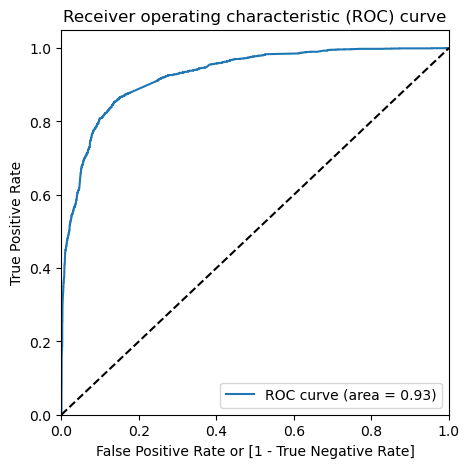

In [101]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

In [102]:
# AUC is 0.93 which is a very good value. We can say that model 5 is good. 
# Now since we took an arbitary cut-off point of 0.5 lets check the optimal point.
# For this specificity and sensitivity intersect point is considered. 
# To draw a plot, lets calculate parameters under different probability levels

num = [float(x)/10 for x in range(0,10)]

for i in num:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.004937,0,1,0,0,0,0,0,0,0,0,0
1,0,0.263259,0,1,1,1,0,0,0,0,0,0,0
2,0,0.263259,0,1,1,1,0,0,0,0,0,0,0
3,0,0.002606,0,1,0,0,0,0,0,0,0,0,0
4,0,0.455921,0,1,1,1,1,1,0,0,0,0,0


In [103]:
inter_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])
for i in num:
    con_met = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(con_met))
    accuracy = (con_met[0,0]+con_met[1,1])/total1
    
    sensitivity = con_met[0,0]/(con_met[0,0]+con_met[0,1])
    specificity = con_met[1,1]/(con_met[1,0]+con_met[1,1])
    inter_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(inter_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381204     0.000000     1.000000
0.1   0.1  0.696446     0.526520     0.972281
0.2   0.2  0.788184     0.700906     0.929861
0.3   0.3  0.852225     0.842173     0.868543
0.4   0.4  0.860231     0.877620     0.832003
0.5   0.5  0.863753     0.908150     0.791684
0.6   0.6  0.850624     0.931436     0.719446
0.7   0.7  0.825008     0.955239     0.613608
0.8   0.8  0.809478     0.973868     0.542629
0.9   0.9  0.772494     0.991203     0.417472


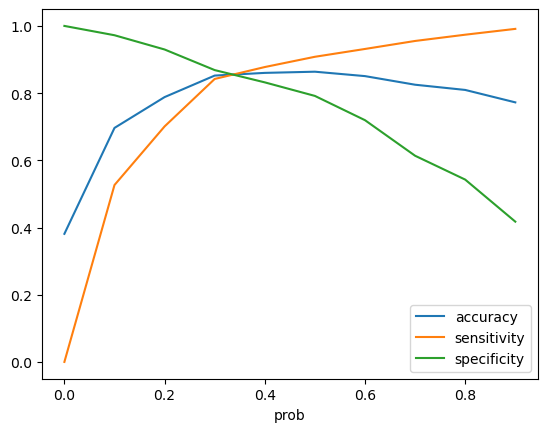

In [104]:
# Lets plot accuracy sensitivity and specificity for various probabilities.
inter_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [105]:
# We can see from the data that the intersection is within 0.3 and 0.4
# Using linear interpolation we can find what is the intersection point


# Coordinates of the four points
x1, y1 = 0.3, 0.852225
x2, y2 = 0.4, 0.860231
x3, y3 = 0.3, 0.842173
x4, y4 = 0.4, 0.87762

# Calculate the slopes of the two lines
slope_AB = (y2 - y1) / (x2 - x1)
slope_CD = (y4 - y3) / (x4 - x3)

# Calculate the intercepts of the two lines
intercept_AB = y1 - slope_AB * x1
intercept_CD = y3 - slope_CD * x3

# Calculate the x-coordinate of the intersection point
intersection_x = (intercept_CD - intercept_AB) / (slope_AB - slope_CD)

# Calculate the y-coordinate of the intersection point
intersection_y = slope_AB * intersection_x + intercept_AB

# Print the intersection point
print(f"Intersection Point (x, y): ({intersection_x:.2f}, {intersection_y:.2f})")



Intersection Point (x, y): (0.34, 0.86)


We can see that 0.34 is the intersection point

In [106]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.004937,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.263259,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.263259,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.002606,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.455921,0,1,1,1,1,1,0,0,0,0,0,1


### Asign a lead score to data

In [107]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Convert_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.004937,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.263259,0,1,1,1,0,0,0,0,0,0,0,0,26
2,0,0.263259,0,1,1,1,0,0,0,0,0,0,0,0,26
3,0,0.002606,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.455921,0,1,1,1,1,1,0,0,0,0,0,1,46


### Model evaluation - 2

In [108]:
# Let's check the overall accuracy.
print("Accuracy :",accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8571886007044508


In [109]:
confusion2 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion)

[[3510  355]
 [ 496 1885]]


In [110]:
# Lets now calculate other evaluation metrics

TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
TP = confusion2[1,1] # true positive 

# Calculate sensitivity
print('Sensitivity:', TP/(TP+FN))

# Calculate specificity
print('Specificity:', TN/(TN+FP))

Sensitivity: 0.8580428391432171
Specificity: 0.8566623544631307


### Predictions on test data

In [111]:
X_test[cols] = scaler.transform(X_test[cols])

In [112]:
final_cols= X_train5.columns
final_cols

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last Activity_Olark Chat Conversation', 'Country_unknown',
       'Specialization_Others', 'What is your current occupation_Working',
       'Last Notable Activity_SMS Sent', 'Tags_Other',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [113]:
X_test = X_test[final_cols]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last Activity_Olark Chat Conversation,Country_unknown,Specialization_Others,What is your current occupation_Working,Last Notable Activity_SMS Sent,Tags_Other,Tags_Will revert after reading the email
6038,0.235294,0.114877,1,0,0,0,0,0,1,0,0
7539,0.235294,0.209067,1,0,0,0,0,0,1,0,1
310,0.411765,0.091109,0,0,0,0,1,0,0,0,1
4412,0.235294,0.124120,0,0,0,0,1,0,0,0,0
9139,0.294118,0.112236,1,0,0,0,0,0,0,1,0


In [114]:
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

6038    0.020302
7539    0.706056
310     0.194385
4412    0.003015
9139    0.108309
815     0.470728
2697    0.136637
9206    0.027633
1531    0.017216
1431    0.001656
dtype: float64

In [115]:
# Converting y_test_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df[:5]

,0
6038,0.020302
7539,0.706056
310,0.194385
4412,0.003015
9139,0.108309


In [116]:
# Renaming the column 
y_pred_df= y_pred_df.rename(columns={ 0 : 'Converted_prob'})

In [117]:
# Converting y_test to a DF
y_test_df = pd.DataFrame(y_test)
y_test_df[:5]

,Converted
6038,0
7539,1
310,0
4412,0
9139,0


In [118]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [119]:
y_pred_final.head()

,Converted,Converted_prob
6038,0,0.020302
7539,1,0.706056
310,0,0.194385
4412,0,0.003015
9139,0,0.108309


In [120]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [121]:
y_pred_final.head()

,Converted,Converted_prob,final_predicted
6038,0,0.020302,0
7539,1,0.706056,1
310,0,0.194385,0
4412,0,0.003015,0
9139,0,0.108309,0


In [122]:
# Check the overall accuracy.
print("Accuracy :",accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.856235997012696


In [123]:
# Making the confusion matrix
confusion3 = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1464,  226],
       [ 159,  829]], dtype=int64)

In [124]:
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives
TP = confusion3[1,1] # true positive 


In [125]:
print("Sensitivity :",TP / float(TP+FN))
print("Specificity :",TN / float(TN+FP))

Sensitivity : 0.8390688259109311
Specificity : 0.8662721893491124


### Assign a lead score to test data

In [126]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Converted,Converted_prob,final_predicted,Lead_Score
6038,0,0.020302,0,2
7539,1,0.706056,1,71
310,0,0.194385,0,19
4412,0,0.003015,0,0
9139,0,0.108309,0,11


In [127]:
y_pred_final.shape

(2678, 4)

### Results

Train data:

Accuracy - 0.86
Sensitivity: 0.79
Specificity: 0.91

Test data:

Accuracy - 0.86
Sensitivity: 0.84
Specificity: 0.87

    

In [128]:
result.params.sort_values(ascending=False)

Total Time Spent on Website                 5.053595
Tags_Will revert after reading the email    4.276847
Tags_Other                                  3.541255
Lead Origin_Lead Add Form                   3.336259
What is your current occupation_Working     2.593780
Last Notable Activity_SMS Sent              1.849293
TotalVisits                                 1.526436
Country_unknown                             1.481625
Lead Origin_Landing Page Submission        -1.196091
Specialization_Others                      -1.318125
Last Activity_Olark Chat Conversation      -1.659225
const                                      -5.469447
dtype: float64

### Recommendations

**Based on the results following recommendations can be given**

1. The Company should use model 5 as the basis for any future predictions
2. X education should focus on leads who spent a lot of time on website
3. X education should continuosly follow-up with leads marked as Will revert after reading the email as they are potential leads for conversion.
4. X education should also consider leads originated from Lead Add Form
5. Working professionals seems to have a higher interest hence high chance of converting them. 
6. X Education should make fields mandatory to capture more data about leads. For eg- Country unknown is a potential lead and this is a level where we imputed with unknown as these fields were filled with 'Select' data. If this (and all others) made mandatory then we can draw meaningful conclusions.
7. X Education should not focus on leads originated from Landing page submission, Specialization others and last activity Olak Chat convesation as these are highly unlikely to get converted